**Demented vs. Nondemented Classification**
---



**Project Overview**

This project involves developing a Machine Learning model to classify patients as demented or non-demented. It is conducted independently using data from the [MRI and Alzheimer's Kaggle Dataset](https://www.kaggle.com/datasets/jboysen/mri-and-alzheimers?select=oasis_longitudinal.csv).

  **Objectives** :  The primary goal for this project is to understand each step in the machine learning development processes, creating a structured guide for developing and deploying the demented vs non-demented classification model. Key steps covered in this project are as follows:
  - `Data Collection`: Gathering and organizing relevant data for model development and training
  - `Data Preprocessing`: Cleaning and preparation stage before proceeding to the analysis stage.
  - `Exploratory Data Analysis (EDA)`: Analyzing the prepared data through visualization and identifying correlations or patterns within variables.
  - `Feature Engineering`: Feature selection to improve efficiency and model accuracy.
  - `Model Selection`: Testing and choosing the most suitable model for classification.
  - `Model Training`: Training the selected model to learn patterns.
  - `Model Evaluation`: Evaluating and giving assesment on model accuracy and effectiveness using several evaluation metrics.
  - `Model Deployment`: Deploying the model to make prediction in a production setting.

# **A. Importing Libraries**

<justify>

In any model development, not only in machine learning, the initial step is to declare all of the necessary libraries. Throughout this machine learning model development, we will be focusing heavily on several notable libraries. Their functions are as follows:
- `Pandas` : data analyzing, data cleaning, exploratory data, and data manipulation
- `Matplotlib` : data visualization and statistical plotting
- `Seaborn` : data visualization and statistical plotting
- `Scikit-learn` : model creation, feature engineering, evaluation, machine learning algorithm
- `Phik` : categorical feature selection

Although their occurences are not as frequent as the libraries above, several other libraries such as `Random`, `Pickle`, and `XGboost` are also implemented in this model development.

In [14]:
# Install feature-engine library
pip install feature-engine

In [2]:
# Install phik library
pip install phik

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 9.1 MB/s eta 0:00:00


In [17]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import phik
import pickle

# Import libraries for Data Preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from feature_engine.outliers import Winsorizer
from sklearn.feature_selection import RFE

# Import libraries for Model Training & Evaluation
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# **B. Data Collection**

The dataset acquired from Kaggle is stored in CSV format. To access the data, we can use the CSV reading function `pd.read_csv` provided by pandas.

In [4]:
pdDS = pd.read_csv('/content/DementedvsNonDemented.csv')

Generally, as we manipulated data for analysis and then for model creation, there are possibilities of accidentally creating irreversible changes into the DataFrame we used. In that scenario, there are no other way except of starting over. An action which will take effort and time.

To mitigate this possibility, we will utilize pandas copy function `.copy()`. This function created a duplication of the data we need and allow for an experiment without affecting the original data. This will prove useful in the long way.

In [6]:
df = pdDS.copy()
df

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


The DataFrame above showed that we have succesfully loaded and copied the dataset. Based on the short information given, we have around 373 data (rows) complete with about 15 input features (columns).

To have better insight on the input features, below are the detailed descriptions along with their data types:

<center>

|**Column Name**|**Description**|**Data Type**|
|:---|:---|:---|
|**Subject ID**|**Subject Identification (i.e. OAS2_0001)**|**Categorical Nominal**|*|
|**MRI ID**|**MRI Exam Identification (i.e. OAS2_0001_MR1)**|**Categorical Nominal**|
|**Group**|**Class (i.e. Demented, Nondemented)**|**Categorical Nominal**|
|**Visit**|**Number of visits (i.e. 1-5)**|**Categorical Ordinal**|
|**MR Delay**|**Number of days of delay between visits (i.e. 0-2639)**|**Numerical Discrete**|
|**M/F**|**Gender (i.e. M, F)**|**Categorical Nominal**|
|**Hand**|**Right or Left-Handed (i.e. R)**|**Categorical Nominal**|
|**Age**|**Age at time of image acquisition (years). (i.e. 60-98)**|**Numerical Discrete**|
|**EDUC**|**Years of education (i.e. 6-23)**|**Numerical Discrete**|
|**SES**|**Socioeconomic status as assessed by the Hollingshead Index of Social Position and classified into categories from 1 (highest status) to 5 (lowest status) (i.e. 1-5)**|**Numerical Discrete**|
|**MMSE**|**Mini-Mental State Examination (i.e. 4-30)**|**Numerical Discrete**|
|**CDR**|**Clinical Dementia Rating (i.e. 0-2)**|**Numerical Continuous**|
|**eTIV**|**Estimated total intracranial volume (cm^3) (i.e. 1106-2004)**|**Numerical Discrete**|
|**nWBV**|**Normalized whole brain volume: expressed as a percent of all voxels in the atlas-masked image that are labeled as gray or white matter by the automated tissue segmentation process (i.e. 0.64-0.84)**|**Numerical Continuous**|
|**ASF**|**Atlas scaling factor (unitless). Computed scaling factor that transforms native-space brain and skull to the atlas target (i.e. the determinant of the transform matrix) (i.e. 0.88-1.59)**|**Numerical Continuous**|

The table above has provided us with each features data type. However, for better understanding in the programming context, below are the data types generated through the `.info()` function.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


Another information we can look into before proceeding onto the next stage is going through the data using the `.describe()` function. This function specifically offer us a comprehensive report on any feature with number. It shows us the exact count of the data, the lowest and highest value, along with its statistical data such as mean and standard deviation. This information gave us a hint on what to expect next. For example, the range value number varies between features, suggesting that in the later course we may need to implement a scaling transformation procedure to our data.

In [8]:
df.describe()

,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,354.000000,371.000000,373.000000,373.000000,373.000000,373.000000
mean,1.882038,595.104558,77.013405,14.597855,2.460452,27.342318,0.290885,1488.128686,0.729568,1.195461
std,0.922843,635.485118,7.640957,2.876339,1.134005,3.683244,0.374557,176.139286,0.037135,0.138092
min,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


# **C. Data Preprocessing**

From here we can see that ....

Furthermore, duplicate....

In [9]:
df.duplicated().sum()

0

In [10]:
df.nunique()

,0
Subject ID,150
MRI ID,373
Group,3
Visit,5
MR Delay,201
M/F,2
Hand,1
Age,39
EDUC,12
SES,5


Drop uncorrelated: `Subject ID`, `MRI ID`, and `Hand`. both subject ID and MRI ID were dropped due to their inherent value being a unique code for each patients and MRI scans, something which does not have any particular meaning related to Dementia. The Hand variable meanwhile, only have 1 unique value, as seen above, and will not be able to provide any information or variability for the model to learn from.

In [11]:
df = df.drop(columns=['MRI ID', 'Hand'])

In [12]:
#Check which variable contain missing value ('NaN')
for i, var in enumerate(df):
  if any(df.iloc[:,i].isnull()):
    print(var, df.iloc[:,i].isnull().sum())

SES 19
MMSE 2


Based on the previous section, we now know that our dataset contain several missing values. To identify the category of missing values, we can filtered the dataframe to display only the data's with NaN values:

In [13]:
df[df.isnull().any(axis=1)]

,Subject ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
2,OAS2_0002,Demented,1,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,Demented,2,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,Demented,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
10,OAS2_0007,Demented,1,0,M,71,16,NaN,28.0,0.5,1357,0.748,1.293
11,OAS2_0007,Demented,3,518,M,73,16,NaN,27.0,1.0,1365,0.727,1.286
12,OAS2_0007,Demented,4,1281,M,75,16,NaN,27.0,1.0,1372,0.710,1.279
134,OAS2_0063,Demented,1,0,F,80,12,NaN,30.0,0.5,1430,0.737,1.228
135,OAS2_0063,Demented,2,490,F,81,12,NaN,27.0,0.5,1453,0.721,1.208
207,OAS2_0099,Demented,1,0,F,80,12,NaN,27.0,0.5,1475,0.762,1.190
208,OAS2_0099,Demented,2,807,F,83,12,NaN,23.0,0.5,1484,0.750,1.183


The filtered dataframe provided the necessary insights efficiently. Out of the 12 columns, only two--SES and MMSE--contain  missing values. The SES column has a total of 19 missing entries, while MMSE has 2, representing approximately 5.1% and 0.5% of the total data, respectively. Further inspection revealed that many missing values originate from the same subject IDs, indicating that fewer subjects are responsible for the missing values than initialy appeared.

Closer examination on the variable details uncovered key insight that defined the category of the missing values. The column SES pertains to the subject's economic condition, while the MMSE column reflects the subject's mental condition. Both variables are likely to be left blank for particular reasons such as the subject's reluctance to disclose this information.

These insights combined indicate that the missing values falls under the category of **MNAR** (Missing Not At Random). Normally, missing values in this category require complex approaches to produce optimal inferences. However, to streamline the overall model development, methods such as **multiple imputation** (MI) can be applied using the following procedure to address these missing values.

To impute the missing data, here we will employe the `IterativeImputer` function derived from `Scikit-learn`. This particular imputation method was chosen due to the inherent property of the missing data--Missing Not At Random (MNAR), as discussed previously. This imputation method will ensure sufficient interference computation to produce

In [ ]:
#Impute missing data with IterativeImputer from sklearn
df_imputer = IterativeImputer()
imputed_df = df_imputer.fit_transform(df[['SES','MMSE']])

imputed_df = pd.DataFrame(imputed_df, columns=df[['SES','MMSE']].columns)

#Convert continuous data on SES and MMSE into discrete data
imputed_df['SES'] = round(imputed_df['SES'])
imputed_df['MMSE'] = round(imputed_df['MMSE'])

imputed_df.head(5)

,SES,MMSE
0,2.0,27.0
1,2.0,30.0
2,3.0,23.0
3,2.0,28.0
4,3.0,22.0


In [ ]:
df.head()

,Subject ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,Demented,1,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,Demented,2,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,Demented,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [ ]:
df['SES'] = imputed_df['SES']
df['MMSE'] = imputed_df['MMSE']
df.head()

,Subject ID,Group,Visit,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,Demented,1,0,M,75,12,3.0,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,Demented,2,560,M,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,Demented,3,1895,M,80,12,3.0,22.0,0.5,1698,0.701,1.034


Before we proceed to the next section, one last thing we must do is convert any value not categorized into 'Dementia' and 'Nondementia'. Because as we learned from the data information above, the 'Group' variable contained as many as 3 unique value. Hence, we need to change them into 'Dementia' first before we can proceed on exploratory data and other steps in this machine learning development.

To do that, first we check the unique value within `Group` variable:

In [ ]:
df['Group'].unique()

array(['Nondemented', 'Demented', 'Converted'], dtype=object)

As seen, the third value not fallen into either 'Demented' or 'Nondemented' is categorized as 'Converted'. This value, based on information from data source, refer to patients who was diagnosed as 'Demented' on a later date. In this project, due to inssuficient information, each Converted value will not be separated into 'Demented' and 'Nondemented' on each MRI Scans, and will instead be recategorized as 'Demented'

In [ ]:
df.loc[df['Group']=='Converted','Group'] = 'Demented'

In [ ]:
df['Group'].unique()

array(['Nondemented', 'Demented'], dtype=object)

# **D. Exploratory Data Analysis (EDA)**

In [ ]:
col_df = df.columns
print(len(df.columns))
col_df

13


Index(['Subject ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Age', 'EDUC', 'SES',
       'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

### I. Histplot

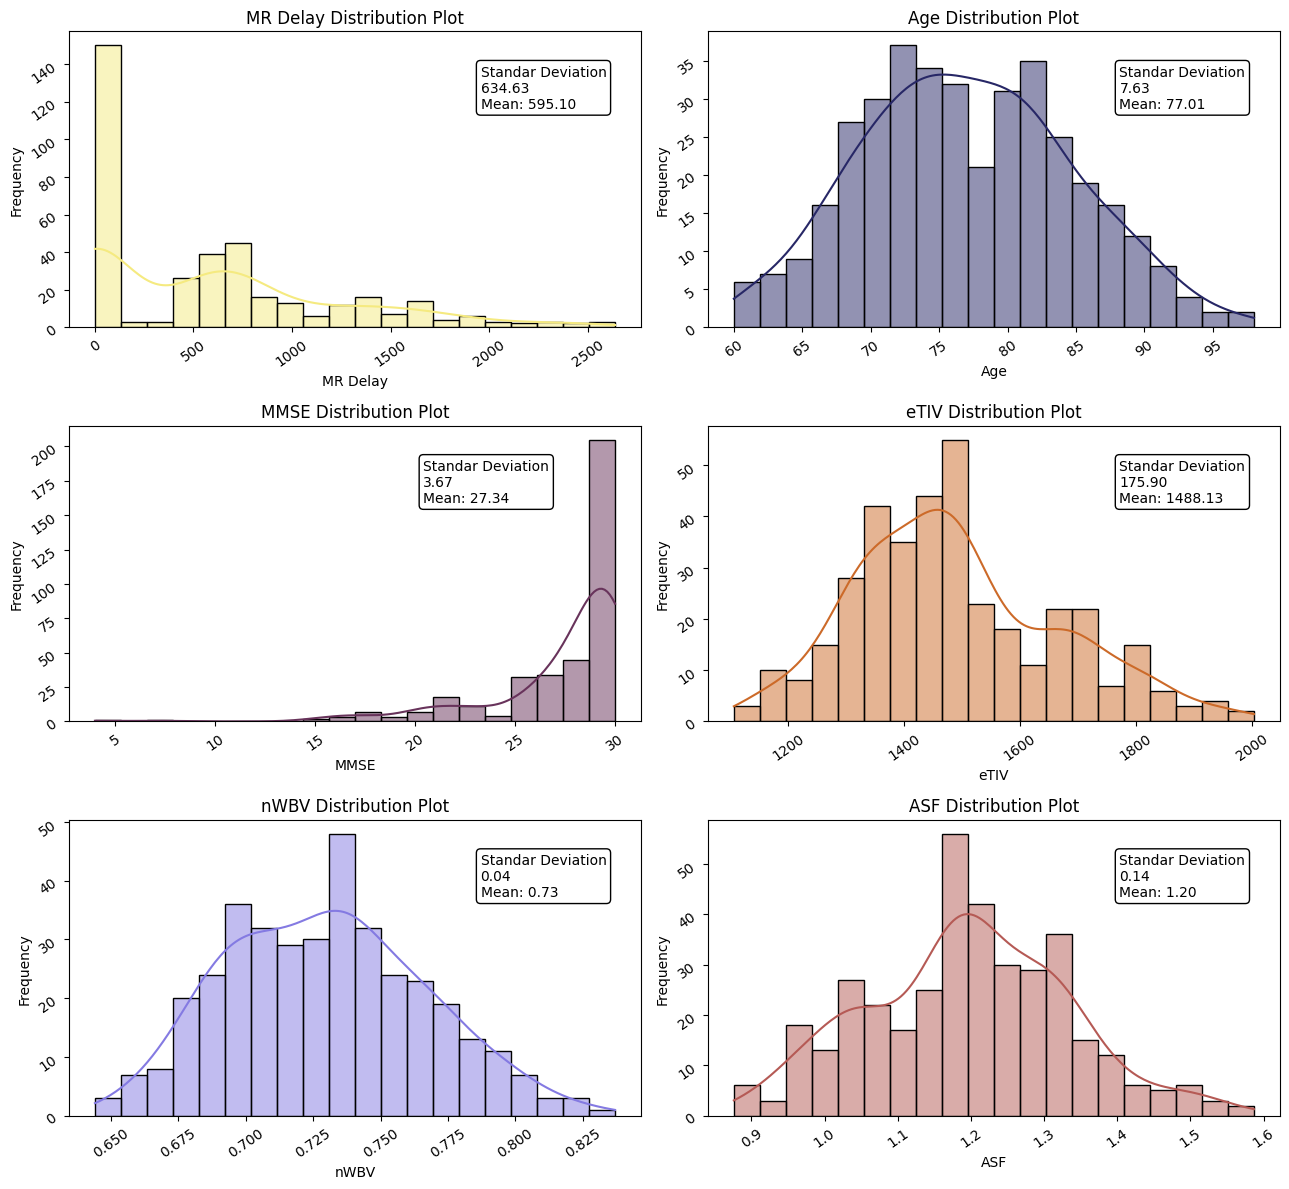

In [ ]:
col_hist = ['MR Delay', 'Age', 'MMSE', 'eTIV', 'nWBV', 'ASF']

fig, axes = plt.subplots(3,2, figsize=(13,12))
axes = axes.flatten()

def random_color():
    return [random.random() for _ in range(3)]

for i, var in enumerate(col_hist):
  std = np.std(df[var])
  mn = np.mean(df[var])

  sns.histplot(data=df, x=var, ax=axes[i], kde=True,color=random_color(), edgecolor='black', bins=20)
  axes[i].set_title(f'{var} Distribution Plot')
  axes[i].set_xlabel(var)
  axes[i].set_ylabel('Frequency')
  axes[i].tick_params(labelrotation=35)

  if var == 'MMSE':
    x_y = (0.6,0.85)
  else:
    x_y = (0.7,0.85)

  props = dict(boxstyle='round', edgecolor='black', facecolor='white')
  axes[i].annotate(f'Standar Deviation\n{std:.2f}\nMean: {mn:.2f}', xy=x_y,
                   xycoords="axes fraction", xytext=(8,8), textcoords="offset points",
                   ha='left', va='top', bbox=props)


for j in range(len(col_hist), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

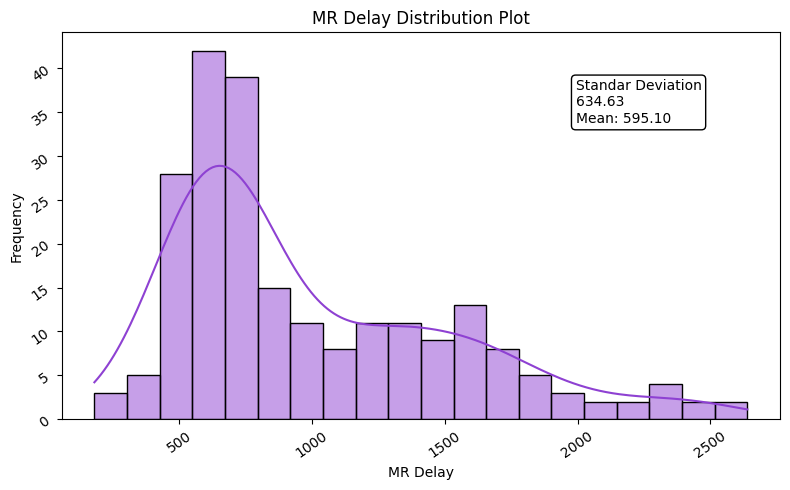

In [ ]:
mrd = df[df['MR Delay']>0]

std = np.std(df['MR Delay'])
mn = np.mean(df['MR Delay'])

plt.figure(figsize=(8,5))
sns.histplot(mrd['MR Delay'], label='MR Delay', kde=True,color=random_color(), edgecolor='black', bins=20)
plt.title('MR Delay Distribution Plot')
plt.xlabel('MR Delay')
plt.ylabel('Frequency')
plt.tick_params(labelrotation=35)

props = dict(boxstyle='round', edgecolor='black', facecolor='white')
plt.annotate(f'Standar Deviation\n{std:.2f}\nMean: {mn:.2f}', xy=x_y,
                   xycoords="axes fraction", xytext=(8,8), textcoords="offset points",
                   ha='left', va='top', bbox=props)

plt.tight_layout()
plt.show()

### Countplot

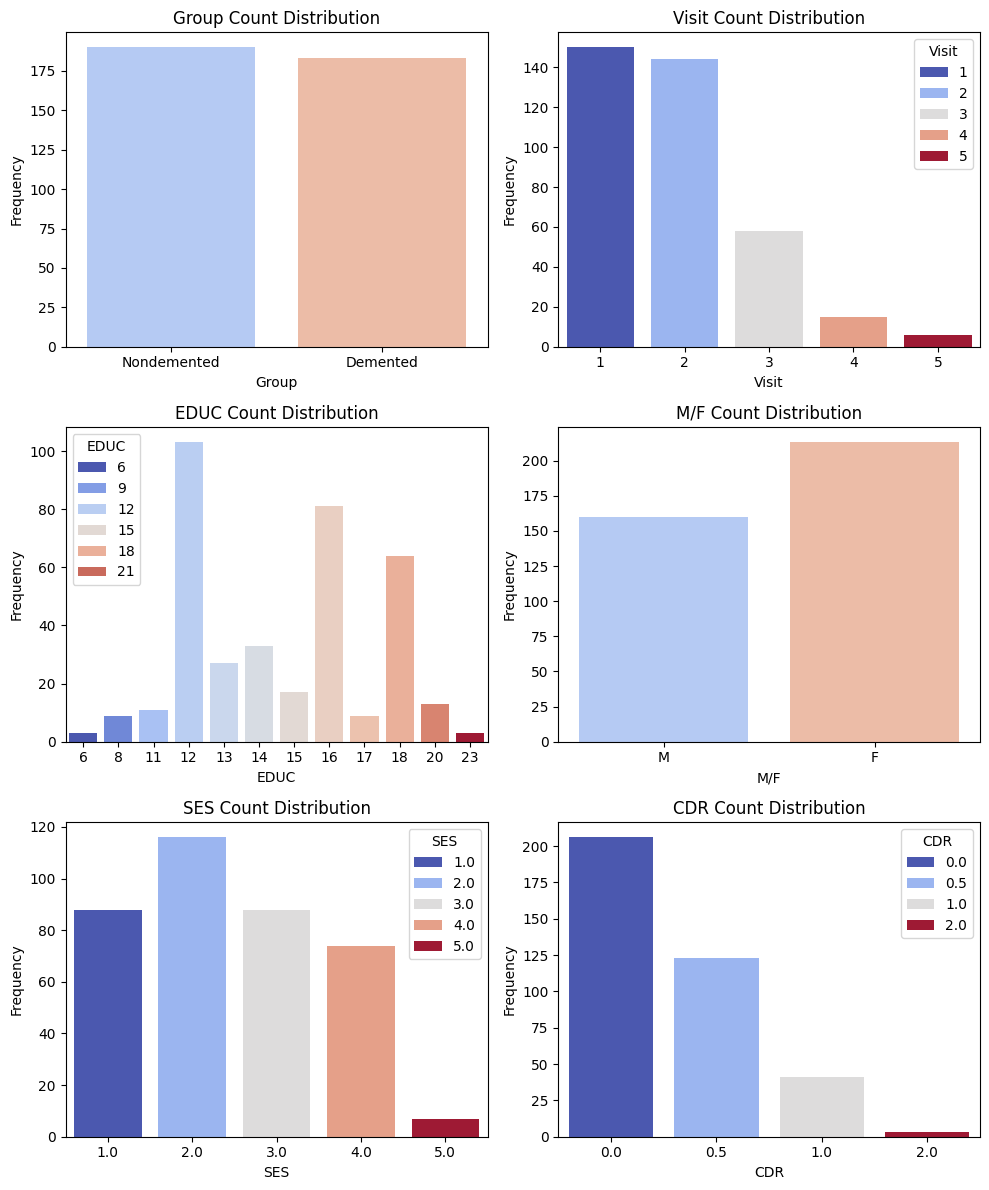

In [ ]:
col_bar = ['Group', 'Visit', 'EDUC','M/F', 'SES', 'CDR']

fig, axes = plt.subplots(3,2, figsize=(10,12))
axes = axes.flatten()

for i, var in enumerate(col_bar):
  sns.countplot(x = var, data=df, ax=axes[i],hue=var, palette='coolwarm')
  axes[i].set_title(f'{var} Count Distribution')
  axes[i].set_xlabel(var)
  axes[i].set_ylabel('Frequency')


for j in range(len(col_bar), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

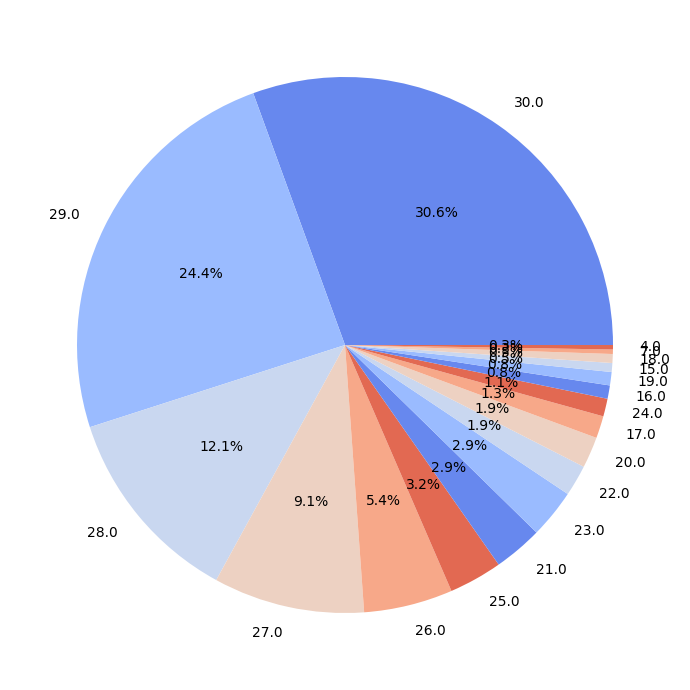

In [ ]:
count = df['MMSE'].value_counts().to_dict()

palette = sns.color_palette('coolwarm')

plt.figure(figsize=(7,7))

plt.pie(count.values(), labels=count.keys(),colors=palette, autopct='%0.1f%%')

plt.tight_layout()
plt.show()

# **E. Feature Engineering**

In [ ]:
df_copy = df.copy().drop(columns='Visit')
df_to_convert = ['Subject ID', 'Group', 'M/F']

for col in df_to_convert:
  df_copy[col] = df_copy[col].astype('category').cat.codes

In [ ]:
coded_df = df_copy.groupby(['Subject ID']).mean()
coded_df

,Group,MR Delay,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Subject ID,,,,,,,,,,,
0,1.0,228.500000,1.0,87.500000,14.0,2.000000,28.500000,0.000000,1995.500000,0.688500,0.879500
1,0.0,818.333333,1.0,77.000000,12.0,2.666667,24.333333,0.500000,1704.666667,0.716667,1.030000
2,1.0,269.000000,0.0,89.000000,18.0,3.000000,27.500000,0.000000,1207.500000,0.714000,1.453000
3,1.0,871.000000,1.0,82.666667,12.0,4.000000,29.000000,0.166667,1696.333333,0.709333,1.034667
4,0.0,599.666667,1.0,73.000000,16.0,2.000000,27.333333,0.833333,1364.666667,0.728333,1.286000
...,...,...,...,...,...,...,...,...,...,...,...
145,0.0,388.000000,1.0,74.000000,12.0,3.000000,21.500000,0.500000,1657.500000,0.697000,1.058500
146,1.0,755.250000,0.0,68.000000,13.0,2.000000,30.000000,0.000000,1504.250000,0.737250,1.166500
147,0.0,276.500000,0.0,72.500000,16.0,3.000000,22.500000,0.750000,1352.500000,0.720500,1.297500


In [ ]:
visit = df['Visit'].groupby(df_copy['Subject ID']).max()
coded_df.insert(2,'Visit',visit)
coded_df

,Group,MR Delay,Visit,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Subject ID,,,,,,,,,,,,
0,1.0,228.500000,2,1.0,87.500000,14.0,2.000000,28.500000,0.000000,1995.500000,0.688500,0.879500
1,0.0,818.333333,3,1.0,77.000000,12.0,2.666667,24.333333,0.500000,1704.666667,0.716667,1.030000
2,1.0,269.000000,2,0.0,89.000000,18.0,3.000000,27.500000,0.000000,1207.500000,0.714000,1.453000
3,1.0,871.000000,3,1.0,82.666667,12.0,4.000000,29.000000,0.166667,1696.333333,0.709333,1.034667
4,0.0,599.666667,4,1.0,73.000000,16.0,2.000000,27.333333,0.833333,1364.666667,0.728333,1.286000
...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.0,388.000000,2,1.0,74.000000,12.0,3.000000,21.500000,0.500000,1657.500000,0.697000,1.058500
146,1.0,755.250000,4,0.0,68.000000,13.0,2.000000,30.000000,0.000000,1504.250000,0.737250,1.166500
147,0.0,276.500000,2,0.0,72.500000,16.0,3.000000,22.500000,0.750000,1352.500000,0.720500,1.297500


In [ ]:
coded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Group     150 non-null    float64
 1   MR Delay  150 non-null    float64
 2   Visit     150 non-null    int64  
 3   M/F       150 non-null    float64
 4   Age       150 non-null    float64
 5   EDUC      150 non-null    float64
 6   SES       150 non-null    float64
 7   MMSE      150 non-null    float64
 8   CDR       150 non-null    float64
 9   eTIV      150 non-null    float64
 10  nWBV      150 non-null    float64
 11  ASF       150 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 14.4 KB


###Outlier

To check for outlier within out datasets, we can once again visit the number of unique values within each variables using the `.nunique()` function.

In [ ]:
coded_df.nunique()

,0
Group,2
MR Delay,144
Visit,4
M/F,2
Age,78
EDUC,12
SES,8
MMSE,36
CDR,12
eTIV,147


Based on the information above, we can infer that some variables such as Visit, M/F, EDUC, SES, MMSE, and CDR fall into the categorical columns type. Generally, this type of columns can be exempted from outlier detection. Thus, in this section, we will check for outliers from the remaining numerical columns: MR Delay, Age, eTIV, nWBV, and ASF.

In [ ]:
copy_df = coded_df['Group'].copy()
copy_df.head()

,Group
Subject ID,
0,1.0
1,0.0
2,1.0
3,1.0
4,0.0


In [ ]:
copy_df[copy_df==1] = 'Demented'
copy_df[copy_df==0] = 'Nondemented'

<ipython-input-31-c0509acaad03>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Demented' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  copy_df[copy_df==1] = 'Demented'


In [ ]:
copy_df.head(3)

,Group
Subject ID,
0,Demented
1,Nondemented
2,Demented


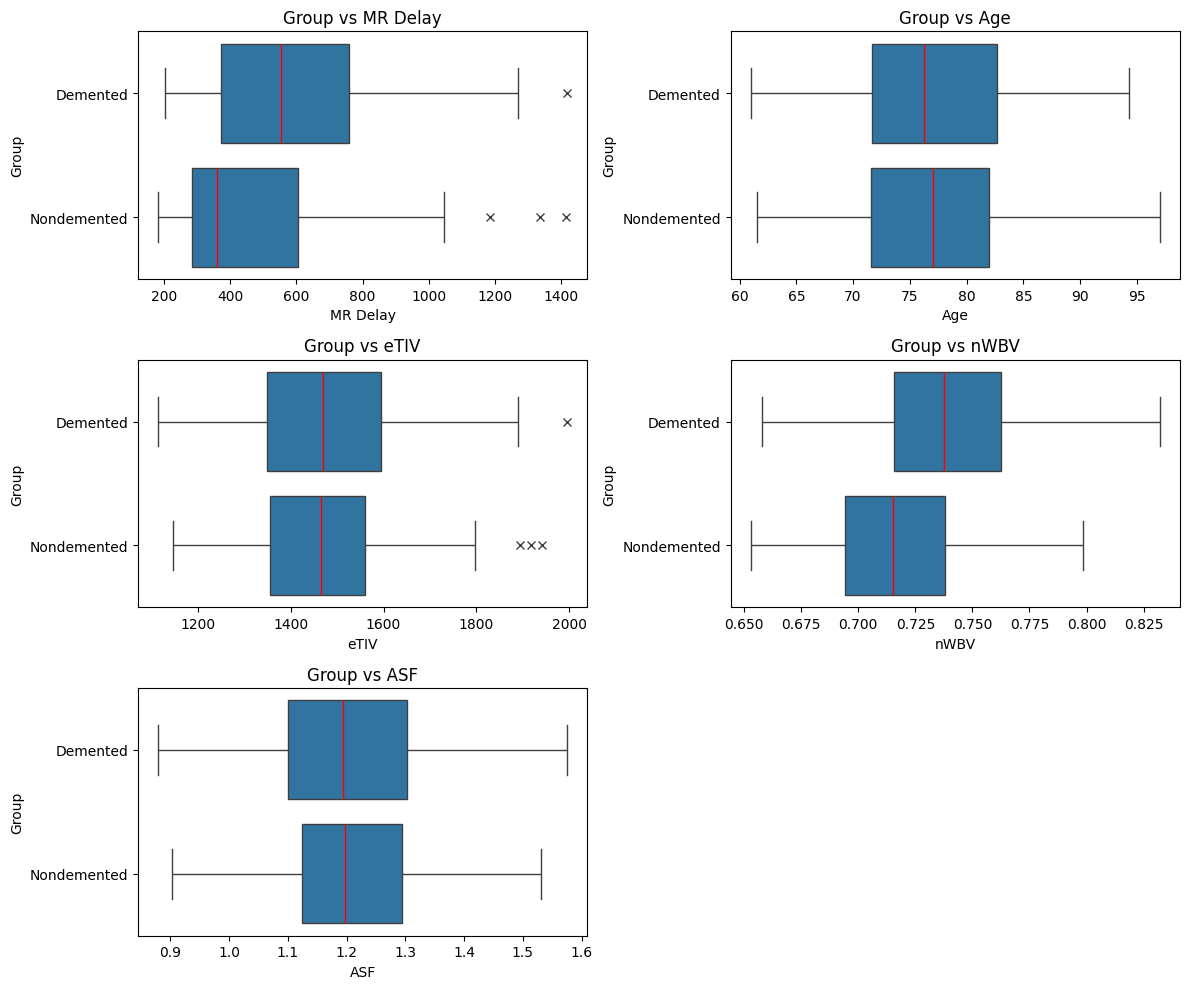

In [ ]:
df_out = ['MR Delay', 'Age', 'eTIV', 'nWBV', 'ASF']

def plot_interquartile_box(data,df,y=copy_df):
  fig, axes = plt.subplots(3, 2, figsize=(12,10))
  axes = axes.flatten()

  for i, var in enumerate(df):
    axes[i]
    sns.boxplot(data=data, x=var, y=y, ax=axes[i], medianprops={'color':'r'}, flierprops={'marker':'x'})
    axes[i].set_title(f'Group vs {var}')

  for j in range(len(df_out),len(axes)):
    axes[j].axis('off')

  plt.tight_layout()
  plt.show()

plot_interquartile_box(coded_df,df_out)

as we can see, numerical columns such as MR Delay and eTIV shows the presence of outliers. Much more than the other columns. before proceeding to detecting the number of outliers. First, we must check for each column skewness type.

In [ ]:
#Define skewness of each numerical column

def check_skewness(df, cols):
  normal = {}
  skewed = {}
  extremely_skewed = {}

  for var in cols:
    skew_score = round(df[var].skew(),2)
    if skew_score <= 0.5:
      normal[var] = skew_score
    elif 0.5 < abs(skew_score) < 1:
      skewed[var] = skew_score
    else:
      extremely_skewed[var] = skew_score

  return normal, skewed, extremely_skewed

normal, skewed, extremely_skewed = check_skewness(coded_df, df_out)

print(f'Normal: {normal}\nSkewed: {skewed}\nExtremely Skewed: {extremely_skewed}')

Normal: {'Age': 0.16, 'nWBV': 0.34, 'ASF': 0.04}
Skewed: {'eTIV': 0.59}
Extremely Skewed: {'MR Delay': 1.14}


In [ ]:
#Find Outliers

def check_outlier_percentage(df, skew_type, cols, distance=1.5):
  for var in cols:
    if skew_type == 'normal':
      std = df[var].std()
      mean = df[var].mean()
      lower_bound = mean - (3 * std)
      upper_bound = mean + (3 * std)
    elif skew_type == 'skewed':
      Q1 = df[var].quantile(0.25)
      Q3 = df[var].quantile(0.75)
      IQR = Q3-Q1
      lower_bound = Q1 - (IQR * distance)
      upper_bound = Q3 + (IQR * distance)

    outliers = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
    outlier_percentage = len(outliers) / len(df) * 100
    outlier_count = len(outliers)

    print(f'Outlier Percentage and Count of {var}: {outlier_percentage:.2f}% and {outlier_count}')

check_outlier_percentage(coded_df,'normal',normal.keys())
check_outlier_percentage(coded_df,'skewed',skewed.keys())
check_outlier_percentage(coded_df,'skewed',extremely_skewed.keys())

Outlier Percentage and Count of Age: 0.00% and 0
Outlier Percentage and Count of nWBV: 0.00% and 0
Outlier Percentage and Count of ASF: 0.00% and 0
Outlier Percentage and Count of eTIV: 1.33% and 2
Outlier Percentage and Count of MR Delay: 2.67% and 4


- none of the normal column have any outlier
- MRI Delay have normal outlier count and percentage. Moreover, the nature of

In [ ]:
def outlier_data(df, var,distance=1.5):
  Q1 = df[var].quantile(0.25)
  Q3 = df[var].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1 - (IQR * distance)
  upper_bound = Q3 + (IQR * distance)

  print(f'lower bound: {lower_bound:.2f}, upper_bound: {upper_bound:.2f}')

  outlier = df[(df[var] < lower_bound) | (df[var] > upper_bound)]
  return outlier

In [ ]:
outlier_data(coded_df,'MR Delay',distance=1.5)

lower bound: -238.22916666666669, upper_bound: 1260.9375


,Group,MR Delay,Visit,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Subject ID,,,,,,,,,,,,
28,0.0,1415.0,4,1.0,86.0,12.0,4.0,27.0,0.5,1483.0,0.71525,1.18325
58,1.0,1268.6,5,1.0,83.4,17.0,1.0,29.2,0.0,1700.6,0.71540,1.03200
60,1.0,1418.0,5,0.0,74.0,14.0,3.0,28.6,0.0,1507.4,0.77780,1.16420
104,0.0,1337.0,5,1.0,82.2,18.0,1.0,29.2,0.4,1656.6,0.70580,1.05940


In [ ]:
outlier_data(coded_df, 'eTIV',distance=1.5)

lower bound: 1009.1875, upper_bound: 1919.6875


,Group,MR Delay,Visit,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Subject ID,,,,,,,,,,,,
0,1.0,228.5,2,1.0,87.5,14.0,2.0,28.5,0.00,1995.5,0.6885,0.8795
54,0.0,248.5,2,1.0,61.5,18.0,1.0,30.0,0.75,1942.5,0.7325,0.9035


The presence of outlier, coupled with the nature of the MRI Delay value indicate the need for applying a transformation. Which will be addressed later on.

Outlier Transformation with Winsorizer()

In [ ]:
def winsorizer(df, variables, capping_method='iqr', tail='both', fold=1.5):
  winsorizer = Winsorizer(capping_method=capping_method, tail=tail, fold=fold, variables=variables)
  df_trained = winsorizer.fit_transform(df)
  return df_trained

transformed_df = winsorizer(coded_df, ['eTIV','MR Delay'])
transformed_df.head()

,Group,MR Delay,Visit,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Subject ID,,,,,,,,,,,,
0,1.0,228.500000,2,1.0,87.500000,14.0,2.000000,28.500000,0.000000,1919.687500,0.688500,0.879500
1,0.0,818.333333,3,1.0,77.000000,12.0,2.666667,24.333333,0.500000,1704.666667,0.716667,1.030000
2,1.0,269.000000,2,0.0,89.000000,18.0,3.000000,27.500000,0.000000,1207.500000,0.714000,1.453000
3,1.0,871.000000,3,1.0,82.666667,12.0,4.000000,29.000000,0.166667,1696.333333,0.709333,1.034667
4,0.0,599.666667,4,1.0,73.000000,16.0,2.000000,27.333333,0.833333,1364.666667,0.728333,1.286000


Re-check outlier

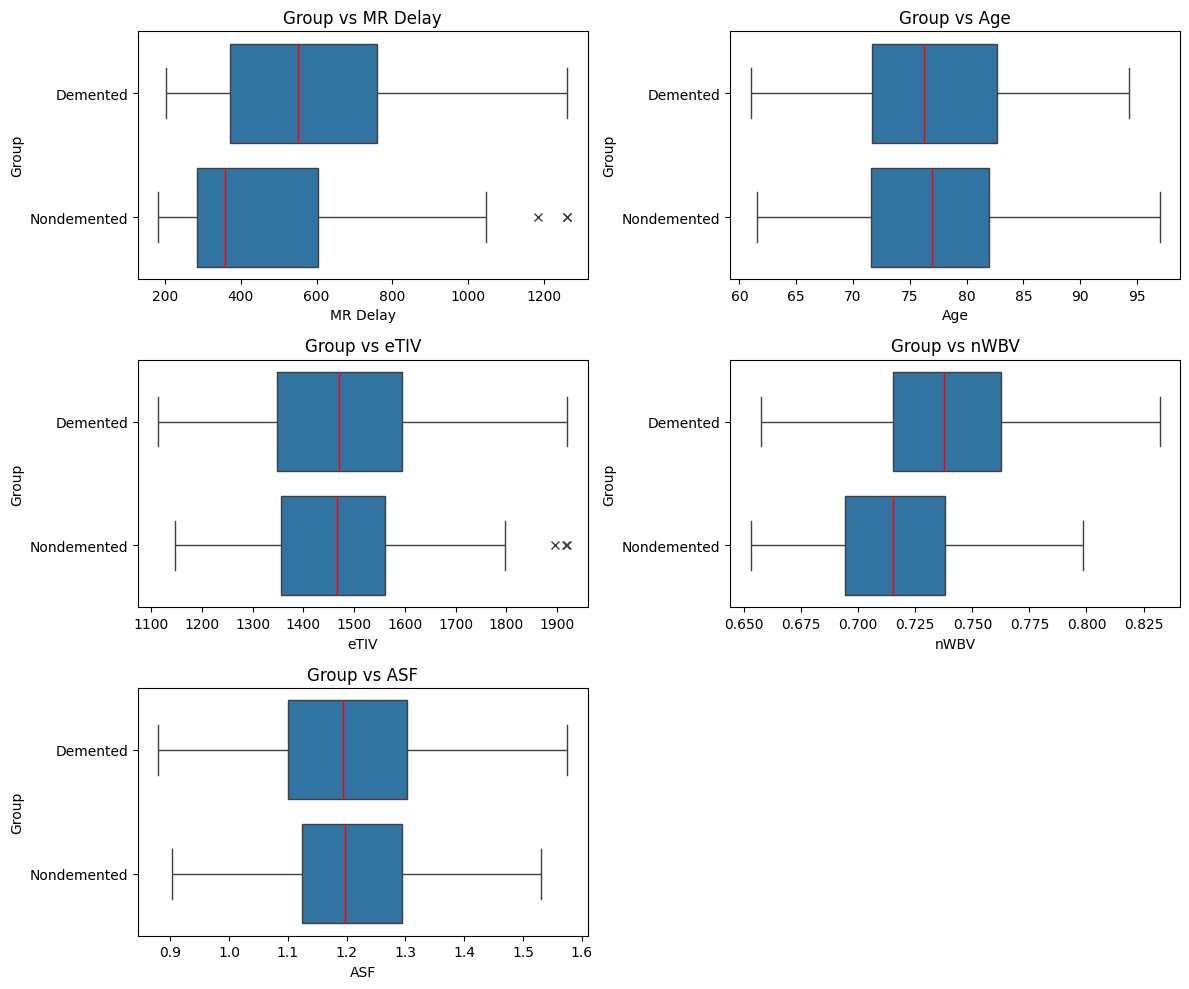

In [ ]:
plot_interquartile_box(transformed_df,df_out)

In [ ]:
check_outlier_percentage(transformed_df,'normal',normal.keys())
check_outlier_percentage(transformed_df,'skewed',skewed.keys())
check_outlier_percentage(transformed_df,'skewed',extremely_skewed.keys())

Outlier Percentage and Count of Age: 0.00% and 0
Outlier Percentage and Count of nWBV: 0.00% and 0
Outlier Percentage and Count of ASF: 0.00% and 0
Outlier Percentage and Count of eTIV: 0.00% and 0
Outlier Percentage and Count of MR Delay: 0.00% and 0


#### Pearson Corelation

<Axes: >

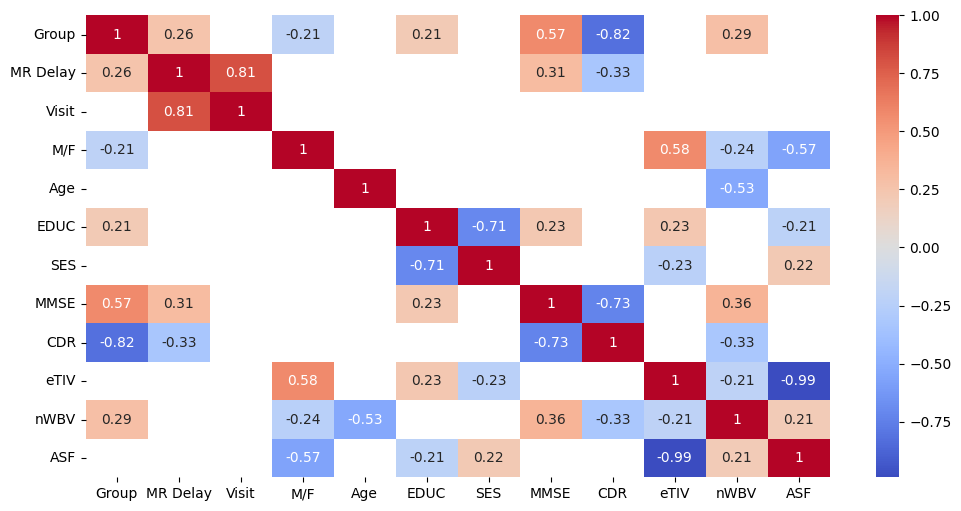

In [ ]:
plt.figure(figsize=(12,6))
corr = transformed_df.corr()
masks = (abs(corr)<=0.2)
sns.heatmap(corr,annot=True,cmap='coolwarm',mask=masks)

In [ ]:
corr['Group']

,Group
Group,1.000000
MR Delay,0.257952
Visit,0.172320
M/F,-0.210282
Age,0.018378
EDUC,0.212378
SES,-0.058347
MMSE,0.572586
CDR,-0.820658
eTIV,0.021582


- Age, ASF, and eTIV has low correlation with target Group
- MRI Delay and nWBV has higher correlation coeffision however it did not reach past 0.3

which we will

### Imbalance Data Check

In [ ]:
val = transformed_df['Group'].value_counts()
val

,count
Group,
0.0,78
1.0,72


In [ ]:
diff = (val[0] - val[1])/val[0]*100
print(f'Count Percentage Difference between Demented and Nondemented is {round(diff,2)}%')

Count Percentage Difference between Demented and Nondemented is 7.69%


Less than 10%

### Feature Selection

Categorical columns selection

#### Phik Correlation

In [ ]:
def phik_correlation(df,cols):
  phik_corr = df[cols].phik_matrix()
  return phik_corr['Group']

categorical_col = ['Group','MMSE', 'Visit', 'EDUC','M/F', 'SES', 'CDR']

phik_corr = phik_correlation(transformed_df, categorical_col)

print(phik_corr[1:])

interval columns not set, guessing: ['Group', 'MMSE', 'Visit', 'EDUC', 'M/F', 'SES', 'CDR']
MMSE     0.816527
Visit    0.166817
EDUC     0.325634
M/F      0.278372
SES      0.000000
CDR      0.999794
Name: Group, dtype: float64


In [ ]:
corr['Group']

,Group
Group,1.000000
MR Delay,0.257952
Visit,0.172320
M/F,-0.210282
Age,0.018378
EDUC,0.212378
SES,-0.058347
MMSE,0.572586
CDR,-0.820658
eTIV,0.021582


comparing both sets of correlation matrix, it can be inferred that MMSE, CDR, M/F, EDUC all contain informations that could prove beneficial later on. While the other two columns, SES and Visit, has low correlation in both correlation matrix. Thus it can be dropped.

In [ ]:
phik_selected_df = transformed_df.drop(columns=['Visit','SES'])
phik_selected_df

,Group,MR Delay,M/F,Age,EDUC,MMSE,CDR,eTIV,nWBV,ASF
Subject ID,,,,,,,,,,
0,1.0,228.500000,1.0,87.500000,14.0,28.500000,0.000000,1919.687500,0.688500,0.879500
1,0.0,818.333333,1.0,77.000000,12.0,24.333333,0.500000,1704.666667,0.716667,1.030000
2,1.0,269.000000,0.0,89.000000,18.0,27.500000,0.000000,1207.500000,0.714000,1.453000
3,1.0,871.000000,1.0,82.666667,12.0,29.000000,0.166667,1696.333333,0.709333,1.034667
4,0.0,599.666667,1.0,73.000000,16.0,27.333333,0.833333,1364.666667,0.728333,1.286000
...,...,...,...,...,...,...,...,...,...,...
145,0.0,388.000000,1.0,74.000000,12.0,21.500000,0.500000,1657.500000,0.697000,1.058500
146,1.0,755.250000,0.0,68.000000,13.0,30.000000,0.000000,1504.250000,0.737250,1.166500
147,0.0,276.500000,0.0,72.500000,16.0,22.500000,0.750000,1352.500000,0.720500,1.297500


#### Categorical Column value handling

In [ ]:
phik_selected_df[['M/F','MMSE','EDUC','CDR']].nunique()

,0
M/F,2
MMSE,36
EDUC,12
CDR,12


In [ ]:
def custom_round(val):
  int_part = int(val)
  dec_part = val - int_part
  if 0 < dec_part <= 0.5:
    return int_part + 0.5
  else:
    return int_part + 1.0

phik_selected_df['CDR'] = phik_selected_df['CDR'].apply(custom_round)
phik_selected_df['MMSE'] = np.round(phik_selected_df['MMSE'])
phik_selected_df

,Group,MR Delay,M/F,Age,EDUC,MMSE,CDR,eTIV,nWBV,ASF
Subject ID,,,,,,,,,,
0,1.0,228.500000,1.0,87.500000,14.0,28.0,1.0,1919.687500,0.688500,0.879500
1,0.0,818.333333,1.0,77.000000,12.0,24.0,0.5,1704.666667,0.716667,1.030000
2,1.0,269.000000,0.0,89.000000,18.0,28.0,1.0,1207.500000,0.714000,1.453000
3,1.0,871.000000,1.0,82.666667,12.0,29.0,0.5,1696.333333,0.709333,1.034667
4,0.0,599.666667,1.0,73.000000,16.0,27.0,1.0,1364.666667,0.728333,1.286000
...,...,...,...,...,...,...,...,...,...,...
145,0.0,388.000000,1.0,74.000000,12.0,22.0,0.5,1657.500000,0.697000,1.058500
146,1.0,755.250000,0.0,68.000000,13.0,30.0,1.0,1504.250000,0.737250,1.166500
147,0.0,276.500000,0.0,72.500000,16.0,22.0,1.0,1352.500000,0.720500,1.297500


In [ ]:
phik_selected_df[['M/F','MMSE','EDUC','CDR']].nunique()

,0
M/F,2
MMSE,14
EDUC,12
CDR,4


#### Recursive Feature Elimination (RFE)

In [ ]:
df_num = ['MR Delay', 'Age', 'eTIV', 'nWBV','ASF']
rfe_x = phik_selected_df[df_num]
rfe_y = phik_selected_df['Group']
rfe_x.head(3)

,MR Delay,Age,eTIV,nWBV,ASF
Subject ID,,,,,
0,228.500000,87.5,1919.687500,0.688500,0.8795
1,818.333333,77.0,1704.666667,0.716667,1.0300
2,269.000000,89.0,1207.500000,0.714000,1.4530


In [ ]:
rfe_mod = SVC(kernel='linear',C=1)

rfe = RFE(rfe_mod,n_features_to_select=3)

In [ ]:
rfe.fit(rfe_x,rfe_y)

RFE(estimator=SVC(C=1, kernel='linear'), n_features_to_select=3)

In [ ]:
selected_col = [col for i, col in enumerate(df_num) if rfe.support_[i] == True]
print('Selected features: ', selected_col)

Selected features:  ['Age', 'nWBV', 'ASF']


In [ ]:
rfe_selected_df = phik_selected_df.drop(columns=['MR Delay', 'eTIV'])
rfe_selected_df.columns

Index(['Group', 'M/F', 'Age', 'EDUC', 'MMSE', 'CDR', 'nWBV', 'ASF'], dtype='object')

# **F. Model Development**

#### Scaling Transformation

In [ ]:
numeric = ['Age','nWBV', 'ASF']

scaler = StandardScaler()
transformer = ColumnTransformer(transformers=[('numeric',scaler,numeric)],
                                remainder='passthrough')

In [ ]:
X = rfe_selected_df.drop(columns='Group')
y = rfe_selected_df['Group']

In [ ]:
transformer.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric', StandardScaler(),
                                 ['Age', 'nWBV', 'ASF'])])

#### Split Data Train-Test

In [ ]:
Xtrain, X_test, ytrain, y_test = train_test_split(X,y,train_size=0.95,random_state=42, stratify=y)

In [ ]:
Xtrain.shape, X_test.shape, ytrain.shape, y_test.shape

((142, 7), (8, 7), (142,), (8,))

In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(Xtrain,ytrain,train_size=0.90,random_state=42, stratify=ytrain)

In [ ]:
X_train.shape, X_validation.shape, y_train.shape, y_validation.shape

((127, 7), (15, 7), (127,), (15,))

####Model Pipeline

In [ ]:
svc_pipe = Pipeline(steps=[('transformer',transformer),('classifier',SVC(kernel='linear',C=1))])
rf_pipe = Pipeline(steps=[('transformer',transformer),('classifier',RandomForestClassifier(max_depth=3,random_state=42))])
dt_pipe = Pipeline(steps=[('transformer',transformer),('classifier',DecisionTreeClassifier(max_depth=3,random_state=42))])
xg_pipe = Pipeline(steps=[('transformer',transformer),('classifier',XGBClassifier(max_depth=3,random_state=42))])
mlp_pipe = Pipeline(steps=[('transformer',transformer),('classifier',MLPClassifier(solver='adam', learning_rate_init=0.01,random_state=42))])

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
svc_cv = cross_val_score(svc_pipe,X_train,y_train,scoring='recall',cv=kfold,n_jobs=-1)
rf_cv = cross_val_score(rf_pipe,X_train,y_train,scoring='recall',cv=kfold,n_jobs=-1)
dt_cv = cross_val_score(dt_pipe,X_train,y_train,scoring='recall',cv=kfold,n_jobs=-1)
xg_cv = cross_val_score(xg_pipe,X_train,y_train,scoring='recall',cv=kfold,n_jobs=-1)
mlp_cv = cross_val_score(mlp_pipe,X_train,y_train,scoring='recall',cv=kfold,n_jobs=-1)

In [ ]:
model_name = ""
cv_score = 0

for cv, name in zip([svc_cv,rf_cv,dt_cv,xg_cv,mlp_cv],['SVC','RandomForest','DecisionTree','XGBoost','MLPerceptron']):
  print(name)
  print('Cross-Validation - Result - Recall: ',cv)
  print('Cross-Validation - Mean - Recall:', cv.mean())
  print('Cross-Validation - Std - Recall:', cv.std())
  print('-'*30)

  if cv.mean() > cv_score:
    cv_score = cv.mean()
    model_name = name
  else:
    pass

print('Best CV Score: ', cv_score)
print('Best Model: ', model_name)


SVC
Cross-Validation - Result - Recall:  [1.         0.64705882 1.         0.91666667 0.9       ]
Cross-Validation - Mean - Recall: 0.8927450980392158
Cross-Validation - Std - Recall: 0.12961006791125454
------------------------------
RandomForest
Cross-Validation - Result - Recall:  [1.         0.82352941 1.         1.         0.9       ]
Cross-Validation - Mean - Recall: 0.9447058823529412
Cross-Validation - Std - Recall: 0.07190920842322883
------------------------------
DecisionTree
Cross-Validation - Result - Recall:  [1.         0.88235294 1.         1.         0.9       ]
Cross-Validation - Mean - Recall: 0.9564705882352941
Cross-Validation - Std - Recall: 0.05360369764656244
------------------------------
XGBoost
Cross-Validation - Result - Recall:  [1.         0.52941176 1.         1.         0.9       ]
Cross-Validation - Mean - Recall: 0.8858823529411766
Cross-Validation - Std - Recall: 0.18239468212972698
------------------------------
MLPerceptron
Cross-Validation - Result

#### Model Training

In [ ]:
dt_pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric', StandardScaler(),
                                                  ['Age', 'nWBV', 'ASF'])])),
                ('classifier',
                 DecisionTreeClassifier(max_depth=3, random_state=42))])

In [ ]:
y_pred_train = dt_pipe.predict(X_train)
y_pred_validation = dt_pipe.predict(X_validation)

In [ ]:
c_matrix_train = confusion_matrix(y_train,y_pred_train,labels=dt_pipe.classes_)
c_visual_train = ConfusionMatrixDisplay(confusion_matrix=c_matrix_train, display_labels=dt_pipe.classes_)

c_matrix_validation = confusion_matrix(y_validation,y_pred_validation,labels=dt_pipe.classes_)
c_visual_validation = ConfusionMatrixDisplay(confusion_matrix=c_matrix_validation, display_labels=dt_pipe.classes_)

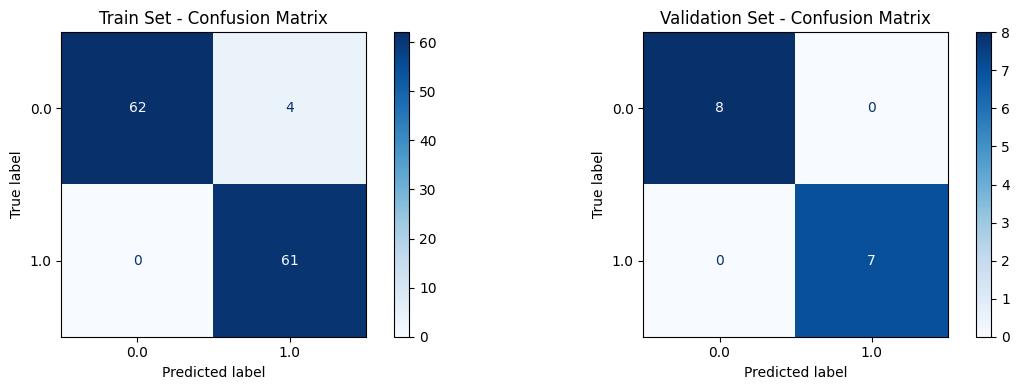

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

c_visual_train.plot(ax=axes[0],cmap='Blues',)
axes[0].set_title('Train Set - Confusion Matrix')


c_visual_validation.plot(ax=axes[1],cmap='Blues')
axes[1].set_title('Validation Set - Confusion Matrix')

plt.tight_layout()
plt.show()

In [ ]:
def report(eval_scores, y_train, y_pred, report_name):
  accuracy = accuracy_score(y_train, y_pred)
  precision = precision_score(y_train, y_pred)
  recall = recall_score(y_train, y_pred)
  F1_score = f1_score(y_train, y_pred)
  auc_score = roc_auc_score(y_train, y_pred)

  scores = {
      'Accuracy' : accuracy,
      'Precision' : precision,
      'Recall' : recall,
      'F1-Score' : F1_score,
      'ROC-AUC' : auc_score
  }

  eval_scores[report_name] = scores

  return eval_scores

eval_scores = {}
eval_scores = report(eval_scores, y_train, y_pred_train, 'Train Set Result')
eval_scores = report(eval_scores, y_validation, y_pred_validation, 'Validation Set Result')

pd.DataFrame(eval_scores)

,Pre-Tuning Train Result,Pre-Tuning Validation Result
Accuracy,0.968504,1.0
Precision,0.938462,1.0
Recall,1.000000,1.0
F1-Score,0.968254,1.0
ROC-AUC,0.969697,1.0


#### Testing on new test data

In [ ]:
y_pred_test = dt_pipe.predict(X_test)

In [ ]:
c_matrix_test = confusion_matrix(y_test,y_pred_test,labels=dt_pipe.classes_)
c_visual_test = ConfusionMatrixDisplay(confusion_matrix=c_matrix_test, display_labels=dt_pipe.classes_)

<Figure size 640x480 with 0 Axes>

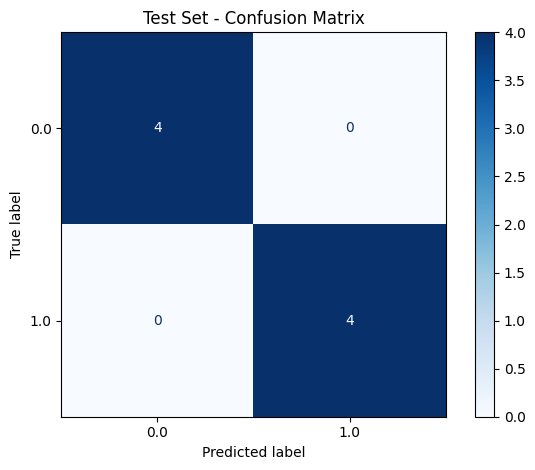

In [ ]:
plt.figure()

c_visual_test.plot(cmap='Blues')
plt.title('Test Set - Confusion Matrix')

plt.tight_layout()
plt.show()

In [ ]:
eval_scores = report(eval_scores, y_test, y_pred_test, 'Test Set Result')

pd.DataFrame(eval_scores)

,Pre-Tuning Train Result,Pre-Tuning Validation Result,Post-Tuning Train Result,Post-Tuning Validation Result,New Test Set Result
Accuracy,0.968504,1.0,0.960630,0.933333,1.0
Precision,0.938462,1.0,0.982759,1.000000,1.0
Recall,1.000000,1.0,0.934426,0.857143,1.0
F1-Score,0.968254,1.0,0.957983,0.923077,1.0
ROC-AUC,0.969697,1.0,0.959637,0.928571,1.0


# **G. Model Deployment**

In [ ]:
with open('dt_model.pkl','wb') as file:
  pickle.dump(dt_pipe,file)